In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer 
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [7]:
df = pd.read_csv('accidental-deaths-in-usa-monthly.csv')

In [9]:
df.head()

,Month,Accidental deaths
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [10]:
df.shape

(72, 2)

In [11]:
X = df['Accidental deaths']
X_train = X.iloc[:-30]
X_test = X.iloc[-30:]

smoothing_level (float, optional) – The smoothing_level value of the simple exponential smoothing, if the value is set then this value will be used as the value.

optimized (bool) – Should the values that have not been set above be optimized automatically?

In [12]:
def evaluation(y_true, y_pred):
    met = {}
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    met['MSE'] = metrics.mean_squared_error(y_true, y_pred)
    met['MAE'] = metrics.mean_absolute_error(y_true, y_pred)
    met['RMSE'] = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    met['MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    met['R2'] = metrics.r2_score(y_true, y_pred)

    data = pd.DataFrame(met, index=[0])
    print(data)

### **SIMPLE EXPONENTIAL SMOOTHENING**

In [13]:
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'\n\nFOR SMOOTHENING LEVEL = {i}')
    fit_v = SimpleExpSmoothing(np.asarray(X_train)).fit(i)
    pred_v= fit_v.forecast(30)
    evaluation(X_test, pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(X_test, pred_v))
    df3 = {'Smoothing Parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)



FOR SMOOTHENING LEVEL = 0
             MSE    MAE        RMSE      MAPE        R2
0  833977.116667  731.4  913.223476  8.708394 -0.032754


FOR SMOOTHENING LEVEL = 0.1
             MSE         MAE        RMSE      MAPE        R2
0  859181.212577  751.814899  926.920284  8.564631 -0.063965


FOR SMOOTHENING LEVEL = 0.2
             MSE        MAE        RMSE      MAPE        R2
0  926964.696838  775.47937  962.790059  8.724462 -0.147905


FOR SMOOTHENING LEVEL = 0.3
             MSE         MAE        RMSE      MAPE        R2
0  903521.286697  768.325723  950.537367  8.676146 -0.118874


FOR SMOOTHENING LEVEL = 0.4
             MSE         MAE        RMSE      MAPE        R2
0  853358.585839  749.176385  923.774099  8.546811 -0.056755


FOR SMOOTHENING LEVEL = 0.5
             MSE         MAE        RMSE      MAPE        R2
0  818119.981192  733.740405  904.499851  8.476723 -0.013117


FOR SMOOTHENING LEVEL = 0.6
             MSE         MAE        RMSE      MAPE        R2
0  807528.7

In [14]:
temp_df = temp_df.sort_values(by=['RMSE'])
print(temp_df)

    Smoothing Parameter        RMSE
6                   0.6  898.626028
7                   0.7  903.056729
5                   0.5  904.499851
8                   0.8  912.755022
0                   0.0  913.223476
9                   0.9  923.700872
4                   0.4  923.774099
1                   0.1  926.920284
10                  1.0  933.326702
3                   0.3  950.537367
2                   0.2  962.790059


In [15]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(X_train)).fit( smoothing_level = 0.6,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
evaluation(X_test,fcst_gs_pred)

             MSE         MAE        RMSE      MAPE        R2
0  807528.737636  727.066667  898.626028  8.501208 -0.000002


In [16]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(X_train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
evaluation(X_test,fcst_auto_pred)

             MSE         MAE        RMSE      MAPE        R2
0  871098.730996  746.999999  933.326701  8.972409 -0.078723


In [17]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,42
Model:,SimpleExpSmoothing,SSE,18572832.624
Optimized:,True,AIC,549.981
Trend:,None,BIC,553.456
Seasonal:,None,AICC,551.062
Seasonal Periods:,None,Date:,"Sat, 14 Jan 2023"
Box-Cox:,False,Time:,22:12:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,8998.2500,l.0,True


In [18]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(73, 103)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [19]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(73    , 103)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

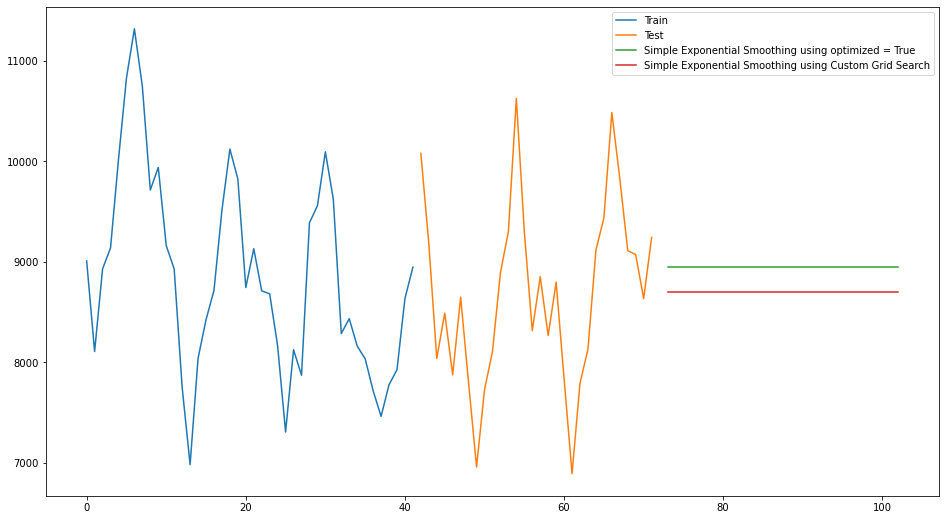

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(X_train, label='Train')
plt.plot(X_test, label='Test')

plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized = True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using Custom Grid Search')
plt.legend(loc='best')
plt.show()

### **DOUBLE EXPONENTIAL SMOOTHENING**

In [21]:
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

Holt Parameters:
    

*   endog (array-like) – Time series
*   expoential (bool, optional) – Type of trend component.
*   damped (bool, optional) – Should the trend component be damped.


Fit Parameters:

*   smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
*   smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
*   damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
*   optimized (bool, optional) – Should the values that have not been set above be optimized automatically?



In [22]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(X_train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(X_test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(X_test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(X_test, df_pred.Forecasted_result))}\n\n')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


0.1 0.1 0.1 True
42    8458.727890
43    8458.783950
44    8458.789556
45    8458.790116
46    8458.790172
47    8458.790178
48    8458.790179
49    8458.790179
50    8458.790179
51    8458.790179
52    8458.790179
53    8458.790179
54    8458.790179
55    8458.790179
56    8458.790179
57    8458.790179
58    8458.790179
59    8458.790179
60    8458.790179
61    8458.790179
62    8458.790179
63    8458.790179
64    8458.790179
65    8458.790179
66    8458.790179
67    8458.790179
68    8458.790179
69    8458.790179
70    8458.790179
71    8458.790179
dtype: float64
 RMSE is 928.6152719162216


0.1 0.2 0.1 True
42    8455.840443
43    8455.953430
44    8455.964729
45    8455.965858
46    8455.965971
47    8455.965983
48    8455.965984
49    8455.965984
50    8455.965984
51    8455.965984
52    8455.965984
53    8455.965984
54    8455.965984
55    8455.965984
56    8455.965984
57    8455.965984
58    8455.965984
59    8455.965984
60    8455.965984
61    8455.965984
62    8455.965984
63  


0.3 0.7 0.1 True
42    8400.029840
43    8401.872771
44    8402.057064
45    8402.075494
46    8402.077337
47    8402.077521
48    8402.077539
49    8402.077541
50    8402.077541
51    8402.077541
52    8402.077541
53    8402.077541
54    8402.077541
55    8402.077541
56    8402.077541
57    8402.077541
58    8402.077541
59    8402.077541
60    8402.077541
61    8402.077541
62    8402.077541
63    8402.077541
64    8402.077541
65    8402.077541
66    8402.077541
67    8402.077541
68    8402.077541
69    8402.077541
70    8402.077541
71    8402.077541
dtype: float64
 RMSE is 944.6294884221836


0.3 0.8 0.1 True
42    8402.693613
43    8404.800639
44    8405.011341
45    8405.032412
46    8405.034519
47    8405.034729
48    8405.034750
49    8405.034752
50    8405.034753
51    8405.034753
52    8405.034753
53    8405.034753
54    8405.034753
55    8405.034753
56    8405.034753
57    8405.034753
58    8405.034753
59    8405.034753
60    8405.034753
61    8405.034753
62    8405.034753
63 

dtype: float64
 RMSE is 898.9479699270032


0.6 0.4 0.1 True
42    8718.822838
43    8720.473347
44    8720.638398
45    8720.654903
46    8720.656553
47    8720.656718
48    8720.656735
49    8720.656737
50    8720.656737
51    8720.656737
52    8720.656737
53    8720.656737
54    8720.656737
55    8720.656737
56    8720.656737
57    8720.656737
58    8720.656737
59    8720.656737
60    8720.656737
61    8720.656737
62    8720.656737
63    8720.656737
64    8720.656737
65    8720.656737
66    8720.656737
67    8720.656737
68    8720.656737
69    8720.656737
70    8720.656737
71    8720.656737
dtype: float64
 RMSE is 899.1499287093677


0.6 0.5 0.1 True
42    8724.886294
43    8726.933435
44    8727.138149
45    8727.158621
46    8727.160668
47    8727.160873
48    8727.160893
49    8727.160895
50    8727.160895
51    8727.160895
52    8727.160895
53    8727.160895
54    8727.160895
55    8727.160895
56    8727.160895
57    8727.160895
58    8727.160895
59    8727.160895
60    8727.160


0.8 0.8 0.1 True
42    8894.157982
43    8897.260588
44    8897.570848
45    8897.601874
46    8897.604977
47    8897.605287
48    8897.605318
49    8897.605321
50    8897.605321
51    8897.605321
52    8897.605321
53    8897.605321
54    8897.605321
55    8897.605321
56    8897.605321
57    8897.605321
58    8897.605321
59    8897.605321
60    8897.605321
61    8897.605321
62    8897.605321
63    8897.605321
64    8897.605321
65    8897.605321
66    8897.605321
67    8897.605321
68    8897.605321
69    8897.605321
70    8897.605321
71    8897.605321
dtype: float64
 RMSE is 921.8033871077117


0.8 0.9 0.1 True
42    8898.824461
43    8902.268244
44    8902.612622
45    8902.647060
46    8902.650504
47    8902.650848
48    8902.650883
49    8902.650886
50    8902.650887
51    8902.650887
52    8902.650887
53    8902.650887
54    8902.650887
55    8902.650887
56    8902.650887
57    8902.650887
58    8902.650887
59    8902.650887
60    8902.650887
61    8902.650887
62    8902.650887
63 

42    8341.764545
43    8344.572676
44    8345.134302
45    8345.246627
46    8345.269092
47    8345.273585
48    8345.274484
49    8345.274664
50    8345.274700
51    8345.274707
52    8345.274708
53    8345.274709
54    8345.274709
55    8345.274709
56    8345.274709
57    8345.274709
58    8345.274709
59    8345.274709
60    8345.274709
61    8345.274709
62    8345.274709
63    8345.274709
64    8345.274709
65    8345.274709
66    8345.274709
67    8345.274709
68    8345.274709
69    8345.274709
70    8345.274709
71    8345.274709
dtype: float64
 RMSE is 963.7374250142792


0.2 0.5 0.2 True
42    8341.157322
43    8344.698726
44    8345.407007
45    8345.548663
46    8345.576994
47    8345.582661
48    8345.583794
49    8345.584021
50    8345.584066
51    8345.584075
52    8345.584077
53    8345.584077
54    8345.584077
55    8345.584077
56    8345.584077
57    8345.584077
58    8345.584077
59    8345.584077
60    8345.584077
61    8345.584077
62    8345.584077
63    8345.584077
64 

0.4 0.3 0.2 True
42    8507.690499
43    8512.147009
44    8513.038311
45    8513.216572
46    8513.252224
47    8513.259354
48    8513.260780
49    8513.261066
50    8513.261123
51    8513.261134
52    8513.261136
53    8513.261137
54    8513.261137
55    8513.261137
56    8513.261137
57    8513.261137
58    8513.261137
59    8513.261137
60    8513.261137
61    8513.261137
62    8513.261137
63    8513.261137
64    8513.261137
65    8513.261137
66    8513.261137
67    8513.261137
68    8513.261137
69    8513.261137
70    8513.261137
71    8513.261137
dtype: float64
 RMSE is 916.7386509807486


0.4 0.4 0.2 True
42    8517.678405
43    8523.599709
44    8524.783969
45    8525.020821
46    8525.068192
47    8525.077666
48    8525.079561
49    8525.079940
50    8525.080016
51    8525.080031
52    8525.080034
53    8525.080034
54    8525.080034
55    8525.080035
56    8525.080035
57    8525.080035
58    8525.080035
59    8525.080035
60    8525.080035
61    8525.080035
62    8525.080035
63  

0.6 0.8 0.2 True
42    8796.158264
43    8809.720166
44    8812.432546
45    8812.975022
46    8813.083517
47    8813.105216
48    8813.109556
49    8813.110424
50    8813.110598
51    8813.110632
52    8813.110639
53    8813.110641
54    8813.110641
55    8813.110641
56    8813.110641
57    8813.110641
58    8813.110641
59    8813.110641
60    8813.110641
61    8813.110641
62    8813.110641
63    8813.110641
64    8813.110641
65    8813.110641
66    8813.110641
67    8813.110641
68    8813.110641
69    8813.110641
70    8813.110641
71    8813.110641
dtype: float64
 RMSE is 907.451623236678


0.6 0.9 0.2 True
42    8807.736346
43    8822.748765
44    8825.751249
45    8826.351746
46    8826.471846
47    8826.495865
48    8826.500669
49    8826.501630
50    8826.501822
51    8826.501861
52    8826.501869
53    8826.501870
54    8826.501870
55    8826.501870
56    8826.501870
57    8826.501870
58    8826.501870
59    8826.501870
60    8826.501870
61    8826.501870
62    8826.501870
63   


0.8 0.4 0.2 True
42    8899.532427
43    8906.744406
44    8908.186802
45    8908.475281
46    8908.532977
47    8908.544516
48    8908.546824
49    8908.547286
50    8908.547378
51    8908.547396
52    8908.547400
53    8908.547401
54    8908.547401
55    8908.547401
56    8908.547401
57    8908.547401
58    8908.547401
59    8908.547401
60    8908.547401
61    8908.547401
62    8908.547401
63    8908.547401
64    8908.547401
65    8908.547401
66    8908.547401
67    8908.547401
68    8908.547401
69    8908.547401
70    8908.547401
71    8908.547401
dtype: float64
 RMSE is 924.5321978725378


0.8 0.5 0.2 True
42    8910.031514
43    8918.825380
44    8920.584153
45    8920.935908
46    8921.006259
47    8921.020329
48    8921.023143
49    8921.023706
50    8921.023819
51    8921.023841
52    8921.023846
53    8921.023846
54    8921.023847
55    8921.023847
56    8921.023847
57    8921.023847
58    8921.023847
59    8921.023847
60    8921.023847
61    8921.023847
62    8921.023847
63 

0.2 0.2 0.3 True
42    8339.622479
43    8342.893486
44    8343.874788
45    8344.169179
46    8344.257496
47    8344.283991
48    8344.291940
49    8344.294324
50    8344.295040
51    8344.295254
52    8344.295319
53    8344.295338
54    8344.295344
55    8344.295346
56    8344.295346
57    8344.295346
58    8344.295346
59    8344.295346
60    8344.295346
61    8344.295346
62    8344.295346
63    8344.295346
64    8344.295346
65    8344.295346
66    8344.295346
67    8344.295346
68    8344.295346
69    8344.295346
70    8344.295346
71    8344.295346
dtype: float64
 RMSE is 964.1782951233504


0.2 0.3 0.3 True
42    8337.141005
43    8342.143014
44    8343.643616
45    8344.093797
46    8344.228851
47    8344.269367
48    8344.281522
49    8344.285169
50    8344.286263
51    8344.286591
52    8344.286689
53    8344.286719
54    8344.286728
55    8344.286730
56    8344.286731
57    8344.286731
58    8344.286731
59    8344.286731
60    8344.286731
61    8344.286731
62    8344.286731
63  


0.5 0.5 0.3 True
42    8688.990480
43    8709.452064
44    8715.590540
45    8717.432082
46    8717.984545
47    8718.150284
48    8718.200006
49    8718.214922
50    8718.219397
51    8718.220740
52    8718.221142
53    8718.221263
54    8718.221299
55    8718.221310
56    8718.221314
57    8718.221314
58    8718.221315
59    8718.221315
60    8718.221315
61    8718.221315
62    8718.221315
63    8718.221315
64    8718.221315
65    8718.221315
66    8718.221315
67    8718.221315
68    8718.221315
69    8718.221315
70    8718.221315
71    8718.221315
dtype: float64
 RMSE is 900.5406260220252


0.5 0.6 0.3 True
42    8708.409827
43    8732.603968
44    8739.862211
45    8742.039684
46    8742.692925
47    8742.888898
48    8742.947690
49    8742.965327
50    8742.970619
51    8742.972206
52    8742.972682
53    8742.972825
54    8742.972868
55    8742.972881
56    8742.972885
57    8742.972886
58    8742.972886
59    8742.972886
60    8742.972886
61    8742.972886
62    8742.972886
63 

0.8 0.5 0.3 True
42    8944.694873
43    8966.177083
44    8972.621746
45    8974.555145
46    8975.135165
47    8975.309171
48    8975.361373
49    8975.377033
50    8975.381731
51    8975.383141
52    8975.383564
53    8975.383691
54    8975.383729
55    8975.383740
56    8975.383743
57    8975.383745
58    8975.383745
59    8975.383745
60    8975.383745
61    8975.383745
62    8975.383745
63    8975.383745
64    8975.383745
65    8975.383745
66    8975.383745
67    8975.383745
68    8975.383745
69    8975.383745
70    8975.383745
71    8975.383745
dtype: float64
 RMSE is 943.1523176126792


0.8 0.6 0.3 True
42    8959.800645
43    8984.655478
44    8992.111928
45    8994.348864
46    8995.019944
47    8995.221268
48    8995.281665
49    8995.299785
50    8995.305220
51    8995.306851
52    8995.307340
53    8995.307487
54    8995.307531
55    8995.307544
56    8995.307548
57    8995.307549
58    8995.307550
59    8995.307550
60    8995.307550
61    8995.307550
62    8995.307550
63  


0.1 0.3 0.4 True
42    8405.973628
43    8408.767454
44    8409.884985
45    8410.331997
46    8410.510801
47    8410.582323
48    8410.610932
49    8410.622376
50    8410.626953
51    8410.628784
52    8410.629516
53    8410.629809
54    8410.629927
55    8410.629973
56    8410.629992
57    8410.630000
58    8410.630003
59    8410.630004
60    8410.630004
61    8410.630005
62    8410.630005
63    8410.630005
64    8410.630005
65    8410.630005
66    8410.630005
67    8410.630005
68    8410.630005
69    8410.630005
70    8410.630005
71    8410.630005
dtype: float64
 RMSE is 942.2190448150742


0.1 0.4 0.4 True
42    8391.616256
43    8395.548735
44    8397.121727
45    8397.750923
46    8398.002602
47    8398.103273
48    8398.143542
49    8398.159649
50    8398.166092
51    8398.168670
52    8398.169700
53    8398.170113
54    8398.170278
55    8398.170344
56    8398.170370
57    8398.170381
58    8398.170385
59    8398.170387
60    8398.170387
61    8398.170388
62    8398.170388
63 

dtype: float64
 RMSE is 958.9657118011513


0.2 0.8 0.4 True
42    8329.080170
43    8357.377456
44    8368.696370
45    8373.223936
46    8375.034962
47    8375.759373
48    8376.049137
49    8376.165043
50    8376.211405
51    8376.229950
52    8376.237368
53    8376.240335
54    8376.241522
55    8376.241996
56    8376.242186
57    8376.242262
58    8376.242293
59    8376.242305
60    8376.242310
61    8376.242312
62    8376.242312
63    8376.242313
64    8376.242313
65    8376.242313
66    8376.242313
67    8376.242313
68    8376.242313
69    8376.242313
70    8376.242313
71    8376.242313
dtype: float64
 RMSE is 956.0497252406169


0.2 0.9 0.4 True
42    8333.698676
43    8366.114641
44    8379.081027
45    8384.267581
46    8386.342203
47    8387.172052
48    8387.503991
49    8387.636767
50    8387.689877
51    8387.711121
52    8387.719619
53    8387.723018
54    8387.724378
55    8387.724922
56    8387.725139
57    8387.725226
58    8387.725261
59    8387.725275
60    8387.725

0.5 0.6 0.4 True
42    8757.951698
43    8804.402884
44    8822.983358
45    8830.415548
46    8833.388423
47    8834.577574
48    8835.053234
49    8835.243498
50    8835.319604
51    8835.350046
52    8835.362223
53    8835.367093
54    8835.369042
55    8835.369821
56    8835.370133
57    8835.370258
58    8835.370307
59    8835.370327
60    8835.370335
61    8835.370339
62    8835.370340
63    8835.370340
64    8835.370341
65    8835.370341
66    8835.370341
67    8835.370341
68    8835.370341
69    8835.370341
70    8835.370341
71    8835.370341
dtype: float64
 RMSE is 913.3685933237814


0.5 0.7 0.4 True
42    8784.820421
43    8837.896778
44    8859.127320
45    8867.619537
46    8871.016424
47    8872.375179
48    8872.918681
49    8873.136082
50    8873.223042
51    8873.257826
52    8873.271740
53    8873.277305
54    8873.279531
55    8873.280422
56    8873.280778
57    8873.280920
58    8873.280977
59    8873.281000
60    8873.281009
61    8873.281013
62    8873.281014
63  

0.7 0.2 0.4 True
42    8844.174552
43    8862.855590
44    8870.328006
45    8873.316972
46    8874.512558
47    8874.990793
48    8875.182087
49    8875.258604
50    8875.289211
51    8875.301454
52    8875.306351
53    8875.308310
54    8875.309093
55    8875.309407
56    8875.309532
57    8875.309582
58    8875.309602
59    8875.309610
60    8875.309614
61    8875.309615
62    8875.309615
63    8875.309616
64    8875.309616
65    8875.309616
66    8875.309616
67    8875.309616
68    8875.309616
69    8875.309616
70    8875.309616
71    8875.309616
dtype: float64
 RMSE is 918.2561813007258


0.7 0.3 0.4 True
42    8873.073952
43    8900.201740
44    8911.052856
45    8915.393302
46    8917.129480
47    8917.823952
48    8918.101740
49    8918.212856
50    8918.257302
51    8918.275080
52    8918.282192
53    8918.285036
54    8918.286174
55    8918.286629
56    8918.286811
57    8918.286884
58    8918.286913
59    8918.286925
60    8918.286929
61    8918.286931
62    8918.286932
63  

0.9 0.7 0.4 True
42    9049.540836
43    9098.851969
44    9118.576421
45    9126.466203
46    9129.622115
47    9130.884480
48    9131.389426
49    9131.591404
50    9131.672196
51    9131.704512
52    9131.717439
53    9131.722610
54    9131.724678
55    9131.725505
56    9131.725836
57    9131.725968
58    9131.726021
59    9131.726043
60    9131.726051
61    9131.726054
62    9131.726056
63    9131.726056
64    9131.726057
65    9131.726057
66    9131.726057
67    9131.726057
68    9131.726057
69    9131.726057
70    9131.726057
71    9131.726057
dtype: float64
 RMSE is 1002.1158942879027


0.9 0.8 0.4 True
42    9061.296659
43    9114.308519
44    9135.513263
45    9143.995161
46    9147.387920
47    9148.745023
48    9149.287865
49    9149.505001
50    9149.591856
51    9149.626598
52    9149.640495
53    9149.646053
54    9149.648277
55    9149.649166
56    9149.649522
57    9149.649664
58    9149.649721
59    9149.649744
60    9149.649753
61    9149.649757
62    9149.649758
63 

0.2 0.4 0.5 True
42    8306.523777
43    8327.561336
44    8338.080116
45    8343.339506
46    8345.969201
47    8347.284048
48    8347.941472
49    8348.270184
50    8348.434540
51    8348.516718
52    8348.557807
53    8348.578351
54    8348.588623
55    8348.593760
56    8348.596328
57    8348.597612
58    8348.598254
59    8348.598575
60    8348.598735
61    8348.598815
62    8348.598856
63    8348.598876
64    8348.598886
65    8348.598891
66    8348.598893
67    8348.598894
68    8348.598895
69    8348.598895
70    8348.598896
71    8348.598896
dtype: float64
 RMSE is 965.3274568083071


0.2 0.5 0.5 True
42    8304.860632
43    8332.402619
44    8346.173612
45    8353.059109
46    8356.501857
47    8358.223232
48    8359.083919
49    8359.514262
50    8359.729434
51    8359.837020
52    8359.890813
53    8359.917709
54    8359.931157
55    8359.937882
56    8359.941244
57    8359.942925
58    8359.943765
59    8359.944185
60    8359.944396
61    8359.944501
62    8359.944553
63  

dtype: float64
 RMSE is 929.4162846997083


0.5 0.6 0.5 True
42    8813.629569
43    8892.054042
44    8931.266278
45    8950.872396
46    8960.675455
47    8965.576985
48    8968.027750
49    8969.253132
50    8969.865823
51    8970.172169
52    8970.325341
53    8970.401928
54    8970.440221
55    8970.459368
56    8970.468941
57    8970.473728
58    8970.476121
59    8970.477318
60    8970.477916
61    8970.478215
62    8970.478365
63    8970.478439
64    8970.478477
65    8970.478496
66    8970.478505
67    8970.478510
68    8970.478512
69    8970.478513
70    8970.478514
71    8970.478514
dtype: float64
 RMSE is 945.54031961541


0.5 0.7 0.5 True
42    8849.147560
43    8938.281407
44    8982.848331
45    9005.131793
46    9016.273523
47    9021.844389
48    9024.629822
49    9026.022538
50    9026.718896
51    9027.067075
52    9027.241165
53    9027.328210
54    9027.371732
55    9027.393493
56    9027.404374
57    9027.409814
58    9027.412534
59    9027.413894
60    9027.41457

0.8 0.5 0.5 True
42    9027.607150
43    9097.391703
44    9132.283979
45    9149.730117
46    9158.453186
47    9162.814720
48    9164.995488
49    9166.085871
50    9166.631063
51    9166.903659
52    9167.039957
53    9167.108106
54    9167.142181
55    9167.159218
56    9167.167736
57    9167.171996
58    9167.174125
59    9167.175190
60    9167.175723
61    9167.175989
62    9167.176122
63    9167.176188
64    9167.176222
65    9167.176238
66    9167.176247
67    9167.176251
68    9167.176253
69    9167.176254
70    9167.176254
71    9167.176255
dtype: float64
 RMSE is 1018.4002162651311


0.8 0.6 0.5 True
42    9052.856189
43    9131.965529
44    9171.520200
45    9191.297535
46    9201.186202
47    9206.130536
48    9208.602703
49    9209.838786
50    9210.456828
51    9210.765849
52    9210.920359
53    9210.997614
54    9211.036242
55    9211.055556
56    9211.065213
57    9211.070041
58    9211.072455
59    9211.073663
60    9211.074266
61    9211.074568
62    9211.074719
63 

0.1 0.4 0.6 True
42    8317.618824
43    8323.941307
44    8327.734796
45    8330.010890
46    8331.376546
47    8332.195940
48    8332.687576
49    8332.982558
50    8333.159547
51    8333.265741
52    8333.329457
53    8333.367686
54    8333.390624
55    8333.404387
56    8333.412644
57    8333.417599
58    8333.420572
59    8333.422355
60    8333.423426
61    8333.424068
62    8333.424453
63    8333.424684
64    8333.424823
65    8333.424906
66    8333.424956
67    8333.424986
68    8333.425004
69    8333.425015
70    8333.425021
71    8333.425025
dtype: float64
 RMSE is 968.9845548393516


0.1 0.5 0.6 True
42    8292.059855
43    8301.313974
44    8306.866445
45    8310.197928
46    8312.196818
47    8313.396151
48    8314.115752
49    8314.547512
50    8314.806568
51    8314.962002
52    8315.055262
53    8315.111218
54    8315.144792
55    8315.164936
56    8315.177022
57    8315.184274
58    8315.188625
59    8315.191236
60    8315.192802
61    8315.193742
62    8315.194306
63  


0.2 0.9 0.6 True
42    8313.962526
43    8406.096772
44    8461.377319
45    8494.545647
46    8514.446644
47    8526.387242
48    8533.551601
49    8537.850217
50    8540.429386
51    8541.976887
52    8542.905388
53    8543.462489
54    8543.796749
55    8543.997305
56    8544.117639
57    8544.189839
58    8544.233159
59    8544.259152
60    8544.274747
61    8544.284104
62    8544.289718
63    8544.293087
64    8544.295108
65    8544.296321
66    8544.297048
67    8544.297485
68    8544.297747
69    8544.297904
70    8544.297998
71    8544.298055
dtype: float64
 RMSE is 925.3186659208922


0.3 0.1 0.6 True
42    8379.883198
43    8391.391561
44    8398.296578
45    8402.439589
46    8404.925395
47    8406.416879
48    8407.311769
49    8407.848703
50    8408.170864
51    8408.364160
52    8408.480138
53    8408.549725
54    8408.591477
55    8408.616528
56    8408.631559
57    8408.640577
58    8408.645988
59    8408.649235
60    8408.651183
61    8408.652352
62    8408.653053
63 

0.4 0.6 0.6 True
42    8711.839394
43    8823.761046
44    8890.914038
45    8931.205833
46    8955.380910
47    8969.885956
48    8978.588984
49    8983.810800
50    8986.943890
51    8988.823744
52    8989.951657
53    8990.628404
54    8991.034452
55    8991.278082
56    8991.424259
57    8991.511965
58    8991.564589
59    8991.596164
60    8991.615108
61    8991.626475
62    8991.633295
63    8991.637387
64    8991.639842
65    8991.641315
66    8991.642199
67    8991.642730
68    8991.643048
69    8991.643239
70    8991.643353
71    8991.643422
dtype: float64
 RMSE is 953.4070278952358


0.4 0.7 0.6 True
42    8759.868281
43    8888.653952
44    8965.925354
45    9012.288196
46    9040.105901
47    9056.796524
48    9066.810898
49    9072.819522
50    9076.424696
51    9078.587801
52    9079.885664
53    9080.664382
54    9081.131612
55    9081.411951
56    9081.580154
57    9081.681076
58    9081.741629
59    9081.777961
60    9081.799760
61    9081.812839
62    9081.820687
63  

0.6 0.3 0.6 True
42    8848.151041
43    8917.983556
44    8959.883064
45    8985.022770
46    9000.106593
47    9009.156887
48    9014.587063
49    9017.845169
50    9019.800032
51    9020.972950
52    9021.676701
53    9022.098952
54    9022.352302
55    9022.504312
56    9022.595518
57    9022.650242
58    9022.683076
59    9022.702777
60    9022.714597
61    9022.721689
62    9022.725945
63    9022.728498
64    9022.730030
65    9022.730949
66    9022.731500
67    9022.731831
68    9022.732030
69    9022.732149
70    9022.732220
71    9022.732263
dtype: float64
 RMSE is 960.2516613682516


0.6 0.4 0.6 True
42    8898.728659
43    8989.355242
44    9043.731191
45    9076.356761
46    9095.932103
47    9107.677308
48    9114.724431
49    9118.952704
50    9121.489669
51    9123.011847
52    9123.925154
53    9124.473139
54    9124.801929
55    9124.999204
56    9125.117568
57    9125.188587
58    9125.231198
59    9125.256765
60    9125.272105
61    9125.281309
62    9125.286832
63  


0.7 0.8 0.6 True
42    9125.630165
43    9274.546657
44    9363.896552
45    9417.506489
46    9449.672451
47    9468.972028
48    9480.551774
49    9487.499622
50    9491.668331
51    9494.169556
52    9495.670291
53    9496.570732
54    9497.110997
55    9497.435156
56    9497.629651
57    9497.746348
58    9497.816367
59    9497.858378
60    9497.883584
61    9497.898708
62    9497.907782
63    9497.913227
64    9497.916494
65    9497.918454
66    9497.919630
67    9497.920336
68    9497.920759
69    9497.921013
70    9497.921165
71    9497.921257
dtype: float64
 RMSE is 1200.9326646232448


0.7 0.9 0.6 True
42    9150.412226
43    9307.835515
44    9402.289488
45    9458.961872
46    9492.965302
47    9513.367360
48    9525.608595
49    9532.953336
50    9537.360181
51    9540.004288
52    9541.590752
53    9542.542630
54    9543.113757
55    9543.456433
56    9543.662039
57    9543.785402
58    9543.859421
59    9543.903831
60    9543.930478
61    9543.946466
62    9543.956059
63

dtype: float64
 RMSE is 1012.35672265361


0.1 0.7 0.7 True
42    8165.501375
43    8182.606148
44    8194.579490
45    8202.960829
46    8208.827766
47    8212.934622
48    8215.809422
49    8217.821781
50    8219.230433
51    8220.216489
52    8220.906728
53    8221.389896
54    8221.728113
55    8221.964865
56    8222.130591
57    8222.246600
58    8222.327806
59    8222.384650
60    8222.424441
61    8222.452295
62    8222.471792
63    8222.485440
64    8222.494994
65    8222.501682
66    8222.506363
67    8222.509640
68    8222.511934
69    8222.513540
70    8222.514664
71    8222.515451
dtype: float64
 RMSE is 1018.8909540914932


0.1 0.8 0.7 True
42    8139.274400
43    8162.641490
44    8178.998454
45    8190.448328
46    8198.463240
47    8204.073679
48    8208.000985
49    8210.750100
50    8212.674481
51    8214.021547
52    8214.964493
53    8215.624556
54    8216.086599
55    8216.410030
56    8216.636432
57    8216.794913
58    8216.905849
59    8216.983505
60    8217.037

0.4 0.8 0.7 True
42    8898.499040
43    9112.600014
44    9262.470696
45    9367.380174
46    9440.816808
47    9492.222452
48    9528.206402
49    9553.395168
50    9571.027304
51    9583.369799
52    9592.009545
53    9598.057368
54    9602.290844
55    9605.254277
56    9607.328680
57    9608.780762
58    9609.797220
59    9610.508740
60    9611.006804
61    9611.355449
62    9611.599501
63    9611.770337
64    9611.889922
65    9611.973632
66    9612.032228
67    9612.073246
68    9612.101958
69    9612.122057
70    9612.136126
71    9612.145975
dtype: float64
 RMSE is 1257.113046908713


0.4 0.9 0.7 True
42    8953.219291
43    9185.513915
44    9348.120152
45    9461.944518
46    9541.621575
47    9597.395514
48    9636.437272
49    9663.766502
50    9682.896963
51    9696.288286
52    9705.662212
53    9712.223960
54    9716.817184
55    9720.032440
56    9722.283120
57    9723.858596
58    9724.961429
59    9725.733412
60    9726.273800
61    9726.652072
62    9726.916862
63  

dtype: float64
 RMSE is 1036.159270658256


0.6 0.4 0.7 True
42    8946.455523
43    9079.793973
44    9173.130887
45    9238.466728
46    9284.201816
47    9316.216378
48    9338.626571
49    9354.313706
50    9365.294701
51    9372.981397
52    9378.362085
53    9382.128566
54    9384.765103
55    9386.610679
56    9387.902582
57    9388.806914
58    9389.439946
59    9389.883069
60    9390.193255
61    9390.410385
62    9390.562376
63    9390.668770
64    9390.743246
65    9390.795378
66    9390.831872
67    9390.857417
68    9390.875298
69    9390.887815
70    9390.896577
71    9390.902711
dtype: float64
 RMSE is 1124.1884621742113


0.6 0.5 0.7 True
42    9006.527245
43    9167.308407
44    9279.855221
45    9358.637990
46    9413.785929
47    9452.389486
48    9479.411976
49    9498.327719
50    9511.568739
51    9520.837453
52    9527.325553
53    9531.867223
54    9535.046392
55    9537.271810
56    9538.829603
57    9539.920058
58    9540.683376
59    9541.217699
60    9541.59

dtype: float64
 RMSE is 983.0035063935386


0.9 0.2 0.7 True
42    9023.869590
43    9098.660847
44    9151.014726
45    9187.662442
46    9213.315843
47    9231.273224
48    9243.843391
49    9252.642507
50    9258.801889
51    9263.113456
52    9266.131553
53    9268.244221
54    9269.723088
55    9270.758296
56    9271.482941
57    9271.990192
58    9272.345268
59    9272.593822
60    9272.767809
61    9272.889600
62    9272.974854
63    9273.034531
64    9273.076306
65    9273.105548
66    9273.126017
67    9273.140346
68    9273.150376
69    9273.157397
70    9273.162311
71    9273.165752
dtype: float64
 RMSE is 1063.1262118434486


0.9 0.3 0.7 True
42    9074.395489
43    9180.628660
44    9254.991880
45    9307.046134
46    9343.484111
47    9368.990696
48    9386.845305
49    9399.343531
50    9408.092289
51    9414.216420
52    9418.503312
53    9421.504136
54    9423.604713
55    9425.075117
56    9426.104399
57    9426.824897
58    9427.329246
59    9427.682290
60    9427.92

dtype: float64
 RMSE is 975.7563138263494


0.2 0.5 0.8 True
42    8129.498394
43    8196.913770
44    8250.846070
45    8293.991910
46    8328.508582
47    8356.121919
48    8378.212589
49    8395.885126
50    8410.023154
51    8421.333577
52    8430.381916
53    8437.620587
54    8443.411523
55    8448.044273
56    8451.750472
57    8454.715432
58    8457.087399
59    8458.984973
60    8460.503033
61    8461.717480
62    8462.689038
63    8463.466284
64    8464.088082
65    8464.585519
66    8464.983469
67    8465.301829
68    8465.556518
69    8465.760268
70    8465.923268
71    8466.053669
dtype: float64
 RMSE is 948.7365884188384


0.2 0.6 0.8 True
42    8130.708306
43    8227.983376
44    8305.803432
45    8368.059477
46    8417.864313
47    8457.708182
48    8489.583277
49    8515.083353
50    8535.483414
51    8551.803463
52    8564.859501
53    8575.304333
54    8583.660197
55    8590.344889
56    8595.692643
57    8599.970846
58    8603.393408
59    8606.131458
60    8608.321

0.4 0.1 0.8 True
42    8477.429769
43    8501.605604
44    8520.946272
45    8536.418806
46    8548.796833
47    8558.699255
48    8566.621193
49    8572.958743
50    8578.028783
51    8582.084815
52    8585.329641
53    8587.925501
54    8590.002190
55    8591.663540
56    8592.992621
57    8594.055885
58    8594.906497
59    8595.586986
60    8596.131377
61    8596.566891
62    8596.915301
63    8597.194030
64    8597.417012
65    8597.595398
66    8597.738107
67    8597.852275
68    8597.943608
69    8598.016675
70    8598.075129
71    8598.121892
dtype: float64
 RMSE is 907.5140215267662


0.4 0.2 0.8 True
42    8509.474591
43    8569.885660
44    8618.214514
45    8656.877598
46    8687.808065
47    8712.552438
48    8732.347937
49    8748.184336
50    8760.853456
51    8770.988751
52    8779.096987
53    8785.583576
54    8790.772848
55    8794.924265
56    8798.245398
57    8800.902305
58    8803.027831
59    8804.728251
60    8806.088587
61    8807.176857
62    8808.047472
63  


0.5 0.8 0.8 True
42     9155.010135
43     9462.761739
44     9708.963023
45     9905.924049
46    10063.492871
47    10189.547928
48    10290.391973
49    10371.067210
50    10435.607399
51    10487.239551
52    10528.545272
53    10561.589849
54    10588.025510
55    10609.174039
56    10626.092863
57    10639.627921
58    10650.455968
59    10659.118406
60    10666.048356
61    10671.592316
62    10676.027484
63    10679.575618
64    10682.414126
65    10684.684932
66    10686.501577
67    10687.954893
68    10689.117545
69    10690.047668
70    10690.791765
71    10691.387043
dtype: float64
 RMSE is 2007.5422003853296


0.5 0.9 0.8 True
42     9202.143856
43     9528.449930
44     9789.494789
45     9998.330676
46    10165.399386
47    10299.054354
48    10405.978328
49    10491.517508
50    10559.948851
51    10614.693926
52    10658.489986
53    10693.526834
54    10721.556312
55    10743.979895
56    10761.918761
57    10776.269854
58    10787.750728
59    10796.935428
60    10

42     9231.118349
43     9477.001175
44     9673.707435
45     9831.072444
46     9956.964450
47    10057.678056
48    10138.248940
49    10202.705648
50    10254.271014
51    10295.523306
52    10328.525141
53    10354.926608
54    10376.047782
55    10392.944721
56    10406.462272
57    10417.276313
58    10425.927546
59    10432.848533
60    10438.385322
61    10442.814753
62    10446.358298
63    10449.193134
64    10451.461003
65    10453.275298
66    10454.726734
67    10455.887882
68    10456.816801
69    10457.559937
70    10458.154445
71    10458.630051
dtype: float64
 RMSE is 1835.3473481542258


0.8 0.7 0.8 True
42     9262.607780
43     9525.210089
44     9735.291936
45     9903.357414
46    10037.809797
47    10145.371703
48    10231.421227
49    10300.260847
50    10355.332543
51    10399.389900
52    10434.635785
53    10462.832493
54    10485.389860
55    10503.435753
56    10517.872468
57    10529.421840
58    10538.661337
59    10546.052935
60    10551.966213
61    1

0.1 0.2 0.9 True
42    8241.153037
43    8214.576914
44    8190.658404
45    8169.131744
46    8149.757751
47    8132.321157
48    8116.628222
49    8102.504581
50    8089.793304
51    8078.353155
52    8068.057020
53    8058.790499
54    8050.450631
55    8042.944749
56    8036.189455
57    8030.109690
58    8024.637902
59    8019.713293
60    8015.281145
61    8011.292212
62    8007.702171
63    8004.471135
64    8001.563203
65    7998.946064
66    7996.590638
67    7994.470756
68    7992.562861
69    7990.845756
70    7989.300362
71    7987.909506
dtype: float64
 RMSE is 1106.726090204099


0.1 0.3 0.9 True
42    8129.286107
43    8103.175263
44    8079.675502
45    8058.525718
46    8039.490912
47    8022.359587
48    8006.941395
49    7993.065021
50    7980.576285
51    7969.336423
52    7959.220547
53    7950.116258
54    7941.922398
55    7934.547924
56    7927.910898
57    7921.937574
58    7916.561583
59    7911.723191
60    7907.368638
61    7903.449540
62    7899.922352
63  

dtype: float64
 RMSE is 920.9282588716019


0.4 0.3 0.9 True
42    8531.692322
43    8657.598118
44    8770.913334
45    8872.897028
46    8964.682353
47    9047.289145
48    9121.635259
49    9188.546760
50    9248.767112
51    9302.965429
52    9351.743914
53    9395.644550
54    9435.155123
55    9470.714638
56    9502.718202
57    9531.521410
58    9557.444296
59    9580.774894
60    9601.772433
61    9620.670217
62    9637.678223
63    9652.985429
64    9666.761913
65    9679.160750
66    9690.319703
67    9700.362760
68    9709.401512
69    9717.536388
70    9724.857777
71    9731.447027
dtype: float64
 RMSE is 1162.589959567816


0.4 0.4 0.9 True
42     8640.215256
43     8841.304799
44     9022.285388
45     9185.167918
46     9331.762195
47     9463.697045
48     9582.438409
49     9689.305637
50     9785.486142
51     9872.048597
52     9949.954806
53    10020.070395
54    10083.174424
55    10139.968051
56    10191.082314
57    10237.085152
58    10278.487706
59    10315.750

dtype: float64
 RMSE is 3444.182788845835


0.5 0.8 0.9 True
42     9270.714841
43     9685.803879
44    10059.384014
45    10395.606136
46    10698.206045
47    10970.545963
48    11215.651890
49    11436.247224
50    11634.783024
51    11813.465245
52    11974.279243
53    12119.011842
54    12249.271180
55    12366.504585
56    12472.014650
57    12566.973707
58    12652.436860
59    12729.353696
60    12798.578850
61    12860.881488
62    12916.953862
63    12967.418998
64    13012.837621
65    13053.714382
66    13090.503467
67    13123.613643
68    13153.412802
69    13180.232044
70    13204.369363
71    13226.092949
dtype: float64
 RMSE is 3670.009155095712


0.5 0.9 0.9 True
42     9315.741213
43     9748.694516
44    10138.352489
45    10489.044665
46    10804.667623
47    11088.728285
48    11344.382881
49    11574.472017
50    11781.552240
51    11967.924440
52    12135.659421
53    12286.620903
54    12422.486237
55    12544.765038
56    12654.815959
57    12753.861787
58  

0.8 0.9 0.9 True
42     9370.171630
43     9733.254660
44    10060.029386
45    10354.126640
46    10618.814169
47    10857.032945
48    11071.429843
49    11264.387052
50    11438.048539
51    11594.343878
52    11735.009683
53    11861.608907
54    11975.548209
55    12078.093581
56    12170.384416
57    12253.446167
58    12328.201743
59    12395.481761
60    12456.033778
61    12510.530593
62    12559.577726
63    12603.720147
64    12643.448325
65    12679.203685
66    12711.383509
67    12740.345351
68    12766.411009
69    12789.870100
70    12810.983283
71    12829.985148
dtype: float64
 RMSE is 3395.2214414129417


0.9 0.1 0.9 True
42    8974.524791
43    9032.279240
44    9084.258244
45    9131.039348
46    9173.142341
47    9211.035035
48    9245.138460
49    9275.831542
50    9303.455316
51    9328.316712
52    9350.691969
53    9370.829700
54    9388.953658
55    9405.265220
56    9419.945626
57    9433.157992
58    9445.049121
59    9455.751137
60    9465.382951
61    947

dtype: float64
 RMSE is 2095.900115379566


0.1 0.7 0.1 False
42    7836.731050
43    7668.732447
44    7500.733844
45    7332.735240
46    7164.736637
47    6996.738033
48    6828.739430
49    6660.740827
50    6492.742223
51    6324.743620
52    6156.745016
53    5988.746413
54    5820.747810
55    5652.749206
56    5484.750603
57    5316.752000
58    5148.753396
59    4980.754793
60    4812.756189
61    4644.757586
62    4476.758983
63    4308.760379
64    4140.761776
65    3972.763172
66    3804.764569
67    3636.765966
68    3468.767362
69    3300.768759
70    3132.770155
71    2964.771552
dtype: float64
 RMSE is 3783.5195421298226


0.1 0.8 0.1 False
42    7405.579358
43    7211.118617
44    7016.657876
45    6822.197136
46    6627.736395
47    6433.275654
48    6238.814914
49    6044.354173
50    5849.893432
51    5655.432692
52    5460.971951
53    5266.511210
54    5072.050469
55    4877.589729
56    4683.128988
57    4488.668247
58    4294.207507
59    4099.746766
60    3905.

dtype: float64
 RMSE is 3963.338504673248


0.4 0.5 0.1 False
42     8776.938035
43     9145.794572
44     9514.651110
45     9883.507648
46    10252.364186
47    10621.220724
48    10990.077262
49    11358.933800
50    11727.790338
51    12096.646876
52    12465.503414
53    12834.359951
54    13203.216489
55    13572.073027
56    13940.929565
57    14309.786103
58    14678.642641
59    15047.499179
60    15416.355717
61    15785.212255
62    16154.068793
63    16522.925330
64    16891.781868
65    17260.638406
66    17629.494944
67    17998.351482
68    18367.208020
69    18736.064558
70    19104.921096
71    19473.777634
dtype: float64
 RMSE is 6268.461404262812


0.4 0.6 0.1 False
42     9005.826801
43     9494.476122
44     9983.125443
45    10471.774764
46    10960.424084
47    11449.073405
48    11937.722726
49    12426.372047
50    12915.021368
51    13403.670688
52    13892.320009
53    14380.969330
54    14869.618651
55    15358.267971
56    15846.917292
57    16335.566613
58

0.6 0.1 0.1 False
42    8680.570489
43    8700.283027
44    8719.995566
45    8739.708105
46    8759.420644
47    8779.133182
48    8798.845721
49    8818.558260
50    8838.270799
51    8857.983337
52    8877.695876
53    8897.408415
54    8917.120954
55    8936.833492
56    8956.546031
57    8976.258570
58    8995.971108
59    9015.683647
60    9035.396186
61    9055.108725
62    9074.821263
63    9094.533802
64    9114.246341
65    9133.958880
66    9153.671418
67    9173.383957
68    9193.096496
69    9212.809035
70    9232.521573
71    9252.234112
dtype: float64
 RMSE is 919.9629212003649


0.6 0.2 0.1 False
42     8789.413870
43     8902.168112
44     9014.922353
45     9127.676595
46     9240.430837
47     9353.185079
48     9465.939321
49     9578.693563
50     9691.447805
51     9804.202047
52     9916.956289
53    10029.710531
54    10142.464773
55    10255.219015
56    10367.973256
57    10480.727498
58    10593.481740
59    10706.235982
60    10818.990224
61    10931.744466


dtype: float64
 RMSE is 8785.190561417285


0.7 0.8 0.1 False
42     9459.860183
43     9963.783425
44    10467.706667
45    10971.629909
46    11475.553152
47    11979.476394
48    12483.399636
49    12987.322879
50    13491.246121
51    13995.169363
52    14499.092605
53    15003.015848
54    15506.939090
55    16010.862332
56    16514.785574
57    17018.708817
58    17522.632059
59    18026.555301
60    18530.478543
61    19034.401786
62    19538.325028
63    20042.248270
64    20546.171512
65    21050.094755
66    21554.017997
67    22057.941239
68    22561.864481
69    23065.787724
70    23569.710966
71    24073.634208
dtype: float64
 RMSE is 9129.862075342513


0.7 0.9 0.1 False
42     9486.185807
43     9998.917525
44    10511.649243
45    11024.380960
46    11537.112678
47    12049.844396
48    12562.576114
49    13075.307832
50    13588.039549
51    14100.771267
52    14613.502985
53    15126.234703
54    15638.966421
55    16151.698138
56    16664.429856
57    17177.161574
58

dtype: float64
 RMSE is 6886.97520610139


0.9 0.6 0.1 False
42     9361.544777
43     9769.781339
44    10178.017901
45    10586.254463
46    10994.491025
47    11402.727587
48    11810.964148
49    12219.200710
50    12627.437272
51    13035.673834
52    13443.910396
53    13852.146957
54    14260.383519
55    14668.620081
56    15076.856643
57    15485.093205
58    15893.329767
59    16301.566328
60    16709.802890
61    17118.039452
62    17526.276014
63    17934.512576
64    18342.749137
65    18750.985699
66    19159.222261
67    19567.458823
68    19975.695385
69    20383.931947
70    20792.168508
71    21200.405070
dtype: float64
 RMSE is 7439.57695223243


0.9 0.7 0.1 False
42     9381.269454
43     9802.643064
44    10224.016673
45    10645.390283
46    11066.763893
47    11488.137502
48    11909.511112
49    12330.884721
50    12752.258331
51    13173.631941
52    13595.005550
53    14016.379160
54    14437.752770
55    14859.126379
56    15280.499989
57    15701.873598
58  

0.2 0.2 0.2 False
42    8035.685570
43    7996.107910
44    7956.530251
45    7916.952592
46    7877.374933
47    7837.797274
48    7798.219615
49    7758.641956
50    7719.064296
51    7679.486637
52    7639.908978
53    7600.331319
54    7560.753660
55    7521.176001
56    7481.598341
57    7442.020682
58    7402.443023
59    7362.865364
60    7323.287705
61    7283.710046
62    7244.132386
63    7204.554727
64    7164.977068
65    7125.399409
66    7085.821750
67    7046.244091
68    7006.666431
69    6967.088772
70    6927.511113
71    6887.933454
dtype: float64
 RMSE is 1603.477465315177


0.2 0.3 0.2 False
42    7967.278245
43    7935.385658
44    7903.493070
45    7871.600483
46    7839.707895
47    7807.815308
48    7775.922721
49    7744.030133
50    7712.137546
51    7680.244959
52    7648.352371
53    7616.459784
54    7584.567196
55    7552.674609
56    7520.782022
57    7488.889434
58    7456.996847
59    7425.104260
60    7393.211672
61    7361.319085
62    7329.426498
63

dtype: float64
 RMSE is 5612.04130223483


0.3 0.7 0.2 False
42     8602.920564
43     9110.312173
44     9617.703782
45    10125.095391
46    10632.486999
47    11139.878608
48    11647.270217
49    12154.661826
50    12662.053435
51    13169.445043
52    13676.836652
53    14184.228261
54    14691.619870
55    15199.011478
56    15706.403087
57    16213.794696
58    16721.186305
59    17228.577914
60    17735.969522
61    18243.361131
62    18750.752740
63    19258.144349
64    19765.535957
65    20272.927566
66    20780.319175
67    21287.710784
68    21795.102393
69    22302.494001
70    22809.885610
71    23317.277219
dtype: float64
 RMSE is 8439.835198208006


0.3 0.8 0.2 False
42     8913.887586
43     9569.151268
44    10224.414950
45    10879.678632
46    11534.942314
47    12190.205997
48    12845.469679
49    13500.733361
50    14155.997043
51    14811.260725
52    15466.524408
53    16121.788090
54    16777.051772
55    17432.315454
56    18087.579136
57    18742.842818
58 

0.5 0.3 0.2 False
42     8733.827577
43     8921.248819
44     9108.670061
45     9296.091302
46     9483.512544
47     9670.933786
48     9858.355027
49    10045.776269
50    10233.197511
51    10420.618753
52    10608.039994
53    10795.461236
54    10982.882478
55    11170.303719
56    11357.724961
57    11545.146203
58    11732.567444
59    11919.988686
60    12107.409928
61    12294.831169
62    12482.252411
63    12669.673653
64    12857.094894
65    13044.516136
66    13231.937378
67    13419.358620
68    13606.779861
69    13794.201103
70    13981.622345
71    14169.043586
dtype: float64
 RMSE is 3229.485965027859


0.5 0.4 0.2 False
42     8905.093566
43     9209.556937
44     9514.020309
45     9818.483681
46    10122.947052
47    10427.410424
48    10731.873796
49    11036.337167
50    11340.800539
51    11645.263910
52    11949.727282
53    12254.190654
54    12558.654025
55    12863.117397
56    13167.580769
57    13472.044140
58    13776.507512
59    14080.970884
60    14

dtype: float64
 RMSE is 9089.41665637886


0.6 0.8 0.2 False
42     9443.160065
43     9971.320675
44    10499.481285
45    11027.641895
46    11555.802505
47    12083.963115
48    12612.123725
49    13140.284335
50    13668.444945
51    14196.605554
52    14724.766164
53    15252.926774
54    15781.087384
55    16309.247994
56    16837.408604
57    17365.569214
58    17893.729824
59    18421.890434
60    18950.051044
61    19478.211653
62    20006.372263
63    20534.532873
64    21062.693483
65    21590.854093
66    22119.014703
67    22647.175313
68    23175.335923
69    23703.496533
70    24231.657143
71    24759.817752
dtype: float64
 RMSE is 9521.855081154796


0.6 0.9 0.2 False
42     9481.639867
43    10028.106741
44    10574.573614
45    11121.040488
46    11667.507361
47    12213.974235
48    12760.441108
49    13306.907981
50    13853.374855
51    14399.841728
52    14946.308602
53    15492.775475
54    16039.242349
55    16585.709222
56    17132.176095
57    17678.642969
58 

42     9129.705671
43     9374.117454
44     9618.529238
45     9862.941021
46    10107.352804
47    10351.764588
48    10596.176371
49    10840.588155
50    11084.999938
51    11329.411721
52    11573.823505
53    11818.235288
54    12062.647072
55    12307.058855
56    12551.470638
57    12795.882422
58    13040.294205
59    13284.705989
60    13529.117772
61    13773.529556
62    14017.941339
63    14262.353122
64    14506.764906
65    14751.176689
66    14995.588473
67    15240.000256
68    15484.412039
69    15728.823823
70    15973.235606
71    16217.647390
dtype: float64
 RMSE is 4508.01068582005


0.8 0.4 0.2 False
42     9239.203591
43     9570.928162
44     9902.652732
45    10234.377303
46    10566.101874
47    10897.826445
48    11229.551016
49    11561.275586
50    11893.000157
51    12224.724728
52    12556.449299
53    12888.173869
54    13219.898440
55    13551.623011
56    13883.347582
57    14215.072153
58    14546.796723
59    14878.521294
60    15210.245865
61    15

dtype: float64
 RMSE is 7669.696754000311


0.9 0.9 0.2 False
42     9379.550171
43     9788.819957
44    10198.089744
45    10607.359530
46    11016.629317
47    11425.899103
48    11835.168890
49    12244.438676
50    12653.708463
51    13062.978249
52    13472.248035
53    13881.517822
54    14290.787608
55    14700.057395
56    15109.327181
57    15518.596968
58    15927.866754
59    16337.136541
60    16746.406327
61    17155.676114
62    17564.945900
63    17974.215687
64    18383.485473
65    18792.755259
66    19202.025046
67    19611.294832
68    20020.564619
69    20429.834405
70    20839.104192
71    21248.373978
dtype: float64
 RMSE is 7472.811064392052


0.1 0.1 0.3 False
42     8807.360931
43     8878.443011
44     8949.525091
45     9020.607171
46     9091.689252
47     9162.771332
48     9233.853412
49     9304.935492
50     9376.017572
51     9447.099653
52     9518.181733
53     9589.263813
54     9660.345893
55     9731.427973
56     9802.510053
57     9873.592134
58


0.3 0.5 0.3 False
42     8223.684465
43     8442.859612
44     8662.034760
45     8881.209907
46     9100.385055
47     9319.560202
48     9538.735350
49     9757.910497
50     9977.085645
51    10196.260792
52    10415.435940
53    10634.611087
54    10853.786235
55    11072.961382
56    11292.136530
57    11511.311677
58    11730.486825
59    11949.661972
60    12168.837120
61    12388.012267
62    12607.187415
63    12826.362562
64    13045.537710
65    13264.712857
66    13483.888005
67    13703.063152
68    13922.238300
69    14141.413447
70    14360.588595
71    14579.763743
dtype: float64
 RMSE is 3319.6571818110924


0.3 0.6 0.3 False
42     8365.411111
43     8716.092285
44     9066.773459
45     9417.454632
46     9768.135806
47    10118.816979
48    10469.498153
49    10820.179327
50    11170.860500
51    11521.541674
52    11872.222848
53    12222.904021
54    12573.585195
55    12924.266369
56    13274.947542
57    13625.628716
58    13976.309890
59    14326.991063
60    

0.6 0.4 0.3 False
42     9087.024275
43     9414.824154
44     9742.624032
45    10070.423910
46    10398.223789
47    10726.023667
48    11053.823546
49    11381.623424
50    11709.423302
51    12037.223181
52    12365.023059
53    12692.822938
54    13020.622816
55    13348.422694
56    13676.222573
57    14004.022451
58    14331.822330
59    14659.622208
60    14987.422086
61    15315.221965
62    15643.021843
63    15970.821722
64    16298.621600
65    16626.421478
66    16954.221357
67    17282.021235
68    17609.821114
69    17937.620992
70    18265.420871
71    18593.220749
dtype: float64
 RMSE is 5853.9511385644555


0.6 0.5 0.3 False
42     9225.085830
43     9638.141863
44    10051.197897
45    10464.253931
46    10877.309965
47    11290.365998
48    11703.422032
49    12116.478066
50    12529.534100
51    12942.590133
52    13355.646167
53    13768.702201
54    14181.758235
55    14594.814269
56    15007.870302
57    15420.926336
58    15833.982370
59    16247.038404
60    1

0.9 0.2 0.3 False
42     9062.979594
43     9210.484147
44     9357.988700
45     9505.493253
46     9652.997806
47     9800.502359
48     9948.006912
49    10095.511465
50    10243.016018
51    10390.520571
52    10538.025124
53    10685.529676
54    10833.034229
55    10980.538782
56    11128.043335
57    11275.547888
58    11423.052441
59    11570.556994
60    11718.061547
61    11865.566100
62    12013.070653
63    12160.575206
64    12308.079759
65    12455.584312
66    12603.088865
67    12750.593418
68    12898.097971
69    13045.602524
70    13193.107077
71    13340.611630
dtype: float64
 RMSE is 2871.3956730409386


0.9 0.3 0.3 False
42     9170.742609
43     9415.753070
44     9660.763530
45     9905.773991
46    10150.784452
47    10395.794913
48    10640.805373
49    10885.815834
50    11130.826295
51    11375.836755
52    11620.847216
53    11865.857677
54    12110.868138
55    12355.878598
56    12600.889059
57    12845.899520
58    13090.909980
59    13335.920441
60    1

0.3 0.3 0.4 False
42    8127.062921
43    8170.125205
44    8213.187488
45    8256.249772
46    8299.312055
47    8342.374338
48    8385.436622
49    8428.498905
50    8471.561189
51    8514.623472
52    8557.685756
53    8600.748039
54    8643.810323
55    8686.872606
56    8729.934890
57    8772.997173
58    8816.059457
59    8859.121740
60    8902.184024
61    8945.246307
62    8988.308591
63    9031.370874
64    9074.433158
65    9117.495441
66    9160.557725
67    9203.620008
68    9246.682292
69    9289.744575
70    9332.806859
71    9375.869142
dtype: float64
 RMSE is 898.6706719903841


0.3 0.4 0.4 False
42     8147.872744
43     8265.827781
44     8383.782818
45     8501.737855
46     8619.692891
47     8737.647928
48     8855.602965
49     8973.558002
50     9091.513039
51     9209.468076
52     9327.423113
53     9445.378150
54     9563.333187
55     9681.288224
56     9799.243261
57     9917.198297
58    10035.153334
59    10153.108371
60    10271.063408
61    10389.018445


42     9363.104693
43     9972.405406
44    10581.706119
45    11191.006832
46    11800.307544
47    12409.608257
48    13018.908970
49    13628.209683
50    14237.510396
51    14846.811109
52    15456.111821
53    16065.412534
54    16674.713247
55    17284.013960
56    17893.314673
57    18502.615386
58    19111.916098
59    19721.216811
60    20330.517524
61    20939.818237
62    21549.118950
63    22158.419663
64    22767.720376
65    23377.021088
66    23986.321801
67    24595.622514
68    25204.923227
69    25814.223940
70    26423.524653
71    27032.825365
dtype: float64
 RMSE is 10814.524866245762


0.4 0.9 0.4 False
42     9441.514823
43    10052.071630
44    10662.628437
45    11273.185243
46    11883.742050
47    12494.298857
48    13104.855663
49    13715.412470
50    14325.969277
51    14936.526083
52    15547.082890
53    16157.639697
54    16768.196504
55    17378.753310
56    17989.310117
57    18599.866924
58    19210.423730
59    19820.980537
60    20431.537344
61    

dtype: float64
 RMSE is 7399.670370915036


0.6 0.6 0.4 False
42     9326.971893
43     9796.902580
44    10266.833266
45    10736.763953
46    11206.694639
47    11676.625325
48    12146.556012
49    12616.486698
50    13086.417385
51    13556.348071
52    14026.278757
53    14496.209444
54    14966.140130
55    15436.070816
56    15906.001503
57    16375.932189
58    16845.862876
59    17315.793562
60    17785.724248
61    18255.654935
62    18725.585621
63    19195.516308
64    19665.446994
65    20135.377680
66    20605.308367
67    21075.239053
68    21545.169740
69    22015.100426
70    22485.031112
71    22954.961799
dtype: float64
 RMSE is 8442.352455709983


0.6 0.7 0.4 False
42     9395.441075
43     9900.346051
44    10405.251027
45    10910.156003
46    11415.060979
47    11919.965955
48    12424.870931
49    12929.775907
50    13434.680883
51    13939.585859
52    14444.490835
53    14949.395811
54    15454.300787
55    15959.205763
56    16464.110739
57    16969.015715
58

0.8 0.1 0.4 False
42    8884.145291
43    8919.867389
44    8955.589487
45    8991.311584
46    9027.033682
47    9062.755779
48    9098.477877
49    9134.199975
50    9169.922072
51    9205.644170
52    9241.366267
53    9277.088365
54    9312.810463
55    9348.532560
56    9384.254658
57    9419.976755
58    9455.698853
59    9491.420951
60    9527.143048
61    9562.865146
62    9598.587243
63    9634.309341
64    9670.031439
65    9705.753536
66    9741.475634
67    9777.197731
68    9812.919829
69    9848.641927
70    9884.364024
71    9920.086122
dtype: float64
 RMSE is 1134.96126251311


0.8 0.2 0.4 False
42     9006.562584
43     9148.293972
44     9290.025361
45     9431.756750
46     9573.488139
47     9715.219528
48     9856.950917
49     9998.682306
50    10140.413695
51    10282.145084
52    10423.876473
53    10565.607862
54    10707.339251
55    10849.070640
56    10990.802029
57    11132.533418
58    11274.264807
59    11415.996196
60    11557.727585
61    11699.458974
6

0.9 0.6 0.4 False
42     9361.544777
43     9769.781339
44    10178.017901
45    10586.254463
46    10994.491025
47    11402.727587
48    11810.964148
49    12219.200710
50    12627.437272
51    13035.673834
52    13443.910396
53    13852.146957
54    14260.383519
55    14668.620081
56    15076.856643
57    15485.093205
58    15893.329767
59    16301.566328
60    16709.802890
61    17118.039452
62    17526.276014
63    17934.512576
64    18342.749137
65    18750.985699
66    19159.222261
67    19567.458823
68    19975.695385
69    20383.931947
70    20792.168508
71    21200.405070
dtype: float64
 RMSE is 7439.57695223243


0.9 0.7 0.4 False
42     9381.269454
43     9802.643064
44    10224.016673
45    10645.390283
46    11066.763893
47    11488.137502
48    11909.511112
49    12330.884721
50    12752.258331
51    13173.631941
52    13595.005550
53    14016.379160
54    14437.752770
55    14859.126379
56    15280.499989
57    15701.873598
58    16123.247208
59    16544.620818
60    169

0.2 0.3 0.5 False
42    7967.278245
43    7935.385658
44    7903.493070
45    7871.600483
46    7839.707895
47    7807.815308
48    7775.922721
49    7744.030133
50    7712.137546
51    7680.244959
52    7648.352371
53    7616.459784
54    7584.567196
55    7552.674609
56    7520.782022
57    7488.889434
58    7456.996847
59    7425.104260
60    7393.211672
61    7361.319085
62    7329.426498
63    7297.533910
64    7265.641323
65    7233.748735
66    7201.856148
67    7169.963561
68    7138.070973
69    7106.178386
70    7074.285799
71    7042.393211
dtype: float64
 RMSE is 1549.3600396330385


0.2 0.4 0.5 False
42    7839.961950
43    7817.249817
44    7794.537685
45    7771.825553
46    7749.113421
47    7726.401289
48    7703.689157
49    7680.977025
50    7658.264893
51    7635.552761
52    7612.840629
53    7590.128497
54    7567.416365
55    7544.704233
56    7521.992101
57    7499.279969
58    7476.567837
59    7453.855705
60    7431.143573
61    7408.431441
62    7385.719309
6

dtype: float64
 RMSE is 11195.247429293186


0.3 0.9 0.5 False
42     9223.024533
43     9977.385829
44    10731.747125
45    11486.108422
46    12240.469718
47    12994.831014
48    13749.192310
49    14503.553606
50    15257.914902
51    16012.276198
52    16766.637494
53    17520.998790
54    18275.360086
55    19029.721382
56    19784.082678
57    20538.443974
58    21292.805270
59    22047.166567
60    22801.527863
61    23555.889159
62    24310.250455
63    25064.611751
64    25818.973047
65    26573.334343
66    27327.695639
67    28082.056935
68    28836.418231
69    29590.779527
70    30345.140823
71    31099.502119
dtype: float64
 RMSE is 13132.838255918785


0.4 0.1 0.5 False
42    8370.615853
43    8363.889175
44    8357.162496
45    8350.435818
46    8343.709139
47    8336.982461
48    8330.255783
49    8323.529104
50    8316.802426
51    8310.075747
52    8303.349069
53    8296.622390
54    8289.895712
55    8283.169033
56    8276.442355
57    8269.715676
58    8262.98899

0.5 0.5 0.5 False
42     9087.497168
43     9498.331119
44     9909.165070
45    10319.999022
46    10730.832973
47    11141.666925
48    11552.500876
49    11963.334828
50    12374.168779
51    12785.002731
52    13195.836682
53    13606.670634
54    14017.504585
55    14428.338536
56    14839.172488
57    15250.006439
58    15660.840391
59    16071.674342
60    16482.508294
61    16893.342245
62    17304.176197
63    17715.010148
64    18125.844100
65    18536.678051
66    18947.512003
67    19358.345954
68    19769.179905
69    20180.013857
70    20590.847808
71    21001.681760
dtype: float64
 RMSE is 7241.499624823894


0.5 0.6 0.5 False
42     9241.266942
43     9727.789461
44    10214.311980
45    10700.834499
46    11187.357018
47    11673.879537
48    12160.402056
49    12646.924575
50    13133.447094
51    13619.969612
52    14106.492131
53    14593.014650
54    15079.537169
55    15566.059688
56    16052.582207
57    16539.104726
58    17025.627245
59    17512.149764
60    17

dtype: float64
 RMSE is 1024.8701021906113


0.7 0.2 0.5 False
42     8918.492814
43     9049.306193
44     9180.119572
45     9310.932951
46     9441.746330
47     9572.559709
48     9703.373089
49     9834.186468
50     9964.999847
51    10095.813226
52    10226.626605
53    10357.439984
54    10488.253363
55    10619.066742
56    10749.880122
57    10880.693501
58    11011.506880
59    11142.320259
60    11273.133638
61    11403.947017
62    11534.760396
63    11665.573775
64    11796.387155
65    11927.200534
66    12058.013913
67    12188.827292
68    12319.640671
69    12450.454050
70    12581.267429
71    12712.080809
dtype: float64
 RMSE is 2482.3337007167106


0.7 0.3 0.5 False
42     9054.499559
43     9291.940203
44     9529.380846
45     9766.821489
46    10004.262133
47    10241.702776
48    10479.143419
49    10716.584063
50    10954.024706
51    11191.465349
52    11428.905993
53    11666.346636
54    11903.787280
55    12141.227923
56    12378.668566
57    12616.109210


0.8 0.7 0.5 False
42     9415.441471
43     9872.184033
44    10328.926596
45    10785.669158
46    11242.411720
47    11699.154283
48    12155.896845
49    12612.639407
50    13069.381970
51    13526.124532
52    13982.867094
53    14439.609657
54    14896.352219
55    15353.094781
56    15809.837344
57    16266.579906
58    16723.322468
59    17180.065031
60    17636.807593
61    18093.550155
62    18550.292718
63    19007.035280
64    19463.777842
65    19920.520404
66    20377.262967
67    20834.005529
68    21290.748091
69    21747.490654
70    22204.233216
71    22660.975778
dtype: float64
 RMSE is 8299.468486415524


0.8 0.8 0.5 False
42     9436.127168
43     9901.423982
44    10366.720796
45    10832.017609
46    11297.314423
47    11762.611237
48    12227.908051
49    12693.204865
50    13158.501679
51    13623.798493
52    14089.095307
53    14554.392121
54    15019.688935
55    15484.985749
56    15950.282563
57    16415.579377
58    16880.876190
59    17346.173004
60    17

0.2 0.7 0.6 False
42     7785.791760
43     7926.181476
44     8066.571193
45     8206.960909
46     8347.350625
47     8487.740341
48     8628.130058
49     8768.519774
50     8908.909490
51     9049.299207
52     9189.688923
53     9330.078639
54     9470.468356
55     9610.858072
56     9751.247788
57     9891.637504
58    10032.027221
59    10172.416937
60    10312.806653
61    10453.196370
62    10593.586086
63    10733.975802
64    10874.365518
65    11014.755235
66    11155.144951
67    11295.534667
68    11435.924384
69    11576.314100
70    11716.703816
71    11857.093533
dtype: float64
 RMSE is 1758.9559368373693


0.2 0.8 0.6 False
42     7732.688368
43     7936.373481
44     8140.058594
45     8343.743707
46     8547.428819
47     8751.113932
48     8954.799045
49     9158.484157
50     9362.169270
51     9565.854383
52     9769.539495
53     9973.224608
54    10176.909721
55    10380.594834
56    10584.279946
57    10787.965059
58    10991.650172
59    11195.335284
60    1

dtype: float64
 RMSE is 3963.338504673248


0.4 0.5 0.6 False
42     8776.938035
43     9145.794572
44     9514.651110
45     9883.507648
46    10252.364186
47    10621.220724
48    10990.077262
49    11358.933800
50    11727.790338
51    12096.646876
52    12465.503414
53    12834.359951
54    13203.216489
55    13572.073027
56    13940.929565
57    14309.786103
58    14678.642641
59    15047.499179
60    15416.355717
61    15785.212255
62    16154.068793
63    16522.925330
64    16891.781868
65    17260.638406
66    17629.494944
67    17998.351482
68    18367.208020
69    18736.064558
70    19104.921096
71    19473.777634
dtype: float64
 RMSE is 6268.461404262812


0.4 0.6 0.6 False
42     9005.826801
43     9494.476122
44     9983.125443
45    10471.774764
46    10960.424084
47    11449.073405
48    11937.722726
49    12426.372047
50    12915.021368
51    13403.670688
52    13892.320009
53    14380.969330
54    14869.618651
55    15358.267971
56    15846.917292
57    16335.566613
58

dtype: float64
 RMSE is 9995.487341213153


0.6 0.1 0.6 False
42    8680.570489
43    8700.283027
44    8719.995566
45    8739.708105
46    8759.420644
47    8779.133182
48    8798.845721
49    8818.558260
50    8838.270799
51    8857.983337
52    8877.695876
53    8897.408415
54    8917.120954
55    8936.833492
56    8956.546031
57    8976.258570
58    8995.971108
59    9015.683647
60    9035.396186
61    9055.108725
62    9074.821263
63    9094.533802
64    9114.246341
65    9133.958880
66    9153.671418
67    9173.383957
68    9193.096496
69    9212.809035
70    9232.521573
71    9252.234112
dtype: float64
 RMSE is 919.9629212003649


0.6 0.2 0.6 False
42     8789.413870
43     8902.168112
44     9014.922353
45     9127.676595
46     9240.430837
47     9353.185079
48     9465.939321
49     9578.693563
50     9691.447805
51     9804.202047
52     9916.956289
53    10029.710531
54    10142.464773
55    10255.219015
56    10367.973256
57    10480.727498
58    10593.481740
59    10706.2

0.7 0.6 0.6 False
42     9369.051049
43     9823.831443
44    10278.611837
45    10733.392231
46    11188.172625
47    11642.953018
48    12097.733412
49    12552.513806
50    13007.294200
51    13462.074594
52    13916.854988
53    14371.635381
54    14826.415775
55    15281.196169
56    15735.976563
57    16190.756957
58    16645.537351
59    17100.317744
60    17555.098138
61    18009.878532
62    18464.658926
63    18919.439320
64    19374.219714
65    19829.000107
66    20283.780501
67    20738.560895
68    21193.341289
69    21648.121683
70    22102.902077
71    22557.682470
dtype: float64
 RMSE is 8225.557128885146


0.7 0.7 0.6 False
42     9422.139959
43     9907.503401
44    10392.866844
45    10878.230287
46    11363.593730
47    11848.957172
48    12334.320615
49    12819.684058
50    13305.047500
51    13790.410943
52    14275.774386
53    14761.137829
54    15246.501271
55    15731.864714
56    16217.228157
57    16702.591600
58    17187.955042
59    17673.318485
60    18

dtype: float64
 RMSE is 2871.3956730409386


0.9 0.3 0.6 False
42     9170.742609
43     9415.753070
44     9660.763530
45     9905.773991
46    10150.784452
47    10395.794913
48    10640.805373
49    10885.815834
50    11130.826295
51    11375.836755
52    11620.847216
53    11865.857677
54    12110.868138
55    12355.878598
56    12600.889059
57    12845.899520
58    13090.909980
59    13335.920441
60    13580.930902
61    13825.941363
62    14070.951823
63    14315.962284
64    14560.972745
65    14805.983205
66    15050.993666
67    15296.004127
68    15541.014588
69    15786.025048
70    16031.035509
71    16276.045970
dtype: float64
 RMSE is 4554.167227210206


0.9 0.4 0.6 False
42     9259.831929
43     9583.489373
44     9907.146817
45    10230.804261
46    10554.461705
47    10878.119149
48    11201.776593
49    11525.434037
50    11849.091481
51    12172.748925
52    12496.406369
53    12820.063813
54    13143.721257
55    13467.378701
56    13791.036145
57    14114.693589
5

dtype: float64
 RMSE is 1051.3402219237382


0.3 0.3 0.7 False
42    8127.062921
43    8170.125205
44    8213.187488
45    8256.249772
46    8299.312055
47    8342.374338
48    8385.436622
49    8428.498905
50    8471.561189
51    8514.623472
52    8557.685756
53    8600.748039
54    8643.810323
55    8686.872606
56    8729.934890
57    8772.997173
58    8816.059457
59    8859.121740
60    8902.184024
61    8945.246307
62    8988.308591
63    9031.370874
64    9074.433158
65    9117.495441
66    9160.557725
67    9203.620008
68    9246.682292
69    9289.744575
70    9332.806859
71    9375.869142
dtype: float64
 RMSE is 898.6706719903841


0.3 0.4 0.7 False
42     8147.872744
43     8265.827781
44     8383.782818
45     8501.737855
46     8619.692891
47     8737.647928
48     8855.602965
49     8973.558002
50     9091.513039
51     9209.468076
52     9327.423113
53     9445.378150
54     9563.333187
55     9681.288224
56     9799.243261
57     9917.198297
58    10035.153334
59    10153.

0.4 0.8 0.7 False
42     9363.104693
43     9972.405406
44    10581.706119
45    11191.006832
46    11800.307544
47    12409.608257
48    13018.908970
49    13628.209683
50    14237.510396
51    14846.811109
52    15456.111821
53    16065.412534
54    16674.713247
55    17284.013960
56    17893.314673
57    18502.615386
58    19111.916098
59    19721.216811
60    20330.517524
61    20939.818237
62    21549.118950
63    22158.419663
64    22767.720376
65    23377.021088
66    23986.321801
67    24595.622514
68    25204.923227
69    25814.223940
70    26423.524653
71    27032.825365
dtype: float64
 RMSE is 10814.524866245762


0.4 0.9 0.7 False
42     9441.514823
43    10052.071630
44    10662.628437
45    11273.185243
46    11883.742050
47    12494.298857
48    13104.855663
49    13715.412470
50    14325.969277
51    14936.526083
52    15547.082890
53    16157.639697
54    16768.196504
55    17378.753310
56    17989.310117
57    18599.866924
58    19210.423730
59    19820.980537
60    2

dtype: float64
 RMSE is 7399.670370915036


0.6 0.6 0.7 False
42     9326.971893
43     9796.902580
44    10266.833266
45    10736.763953
46    11206.694639
47    11676.625325
48    12146.556012
49    12616.486698
50    13086.417385
51    13556.348071
52    14026.278757
53    14496.209444
54    14966.140130
55    15436.070816
56    15906.001503
57    16375.932189
58    16845.862876
59    17315.793562
60    17785.724248
61    18255.654935
62    18725.585621
63    19195.516308
64    19665.446994
65    20135.377680
66    20605.308367
67    21075.239053
68    21545.169740
69    22015.100426
70    22485.031112
71    22954.961799
dtype: float64
 RMSE is 8442.352455709983


0.6 0.7 0.7 False
42     9395.441075
43     9900.346051
44    10405.251027
45    10910.156003
46    11415.060979
47    11919.965955
48    12424.870931
49    12929.775907
50    13434.680883
51    13939.585859
52    14444.490835
53    14949.395811
54    15454.300787
55    15959.205763
56    16464.110739
57    16969.015715
58

0.8 0.3 0.7 False
42     9129.705671
43     9374.117454
44     9618.529238
45     9862.941021
46    10107.352804
47    10351.764588
48    10596.176371
49    10840.588155
50    11084.999938
51    11329.411721
52    11573.823505
53    11818.235288
54    12062.647072
55    12307.058855
56    12551.470638
57    12795.882422
58    13040.294205
59    13284.705989
60    13529.117772
61    13773.529556
62    14017.941339
63    14262.353122
64    14506.764906
65    14751.176689
66    14995.588473
67    15240.000256
68    15484.412039
69    15728.823823
70    15973.235606
71    16217.647390
dtype: float64
 RMSE is 4508.01068582005


0.8 0.4 0.7 False
42     9239.203591
43     9570.928162
44     9902.652732
45    10234.377303
46    10566.101874
47    10897.826445
48    11229.551016
49    11561.275586
50    11893.000157
51    12224.724728
52    12556.449299
53    12888.173869
54    13219.898440
55    13551.623011
56    13883.347582
57    14215.072153
58    14546.796723
59    14878.521294
60    152

0.9 0.8 0.7 False
42     9386.169592
43     9806.855161
44    10227.540731
45    10648.226300
46    11068.911870
47    11489.597440
48    11910.283009
49    12330.968579
50    12751.654148
51    13172.339718
52    13593.025288
53    14013.710857
54    14434.396427
55    14855.081996
56    15275.767566
57    15696.453136
58    16117.138705
59    16537.824275
60    16958.509844
61    17379.195414
62    17799.880984
63    18220.566553
64    18641.252123
65    19061.937692
66    19482.623262
67    19903.308832
68    20323.994401
69    20744.679971
70    21165.365541
71    21586.051110
dtype: float64
 RMSE is 7669.696754000311


0.9 0.9 0.7 False
42     9379.550171
43     9788.819957
44    10198.089744
45    10607.359530
46    11016.629317
47    11425.899103
48    11835.168890
49    12244.438676
50    12653.708463
51    13062.978249
52    13472.248035
53    13881.517822
54    14290.787608
55    14700.057395
56    15109.327181
57    15518.596968
58    15927.866754
59    16337.136541
60    16

dtype: float64
 RMSE is 1549.3600396330385


0.2 0.4 0.8 False
42    7839.961950
43    7817.249817
44    7794.537685
45    7771.825553
46    7749.113421
47    7726.401289
48    7703.689157
49    7680.977025
50    7658.264893
51    7635.552761
52    7612.840629
53    7590.128497
54    7567.416365
55    7544.704233
56    7521.992101
57    7499.279969
58    7476.567837
59    7453.855705
60    7431.143573
61    7408.431441
62    7385.719309
63    7363.007177
64    7340.295044
65    7317.582912
66    7294.870780
67    7272.158648
68    7249.446516
69    7226.734384
70    7204.022252
71    7181.310120
dtype: float64
 RMSE is 1522.7873247657515


0.2 0.5 0.8 False
42    7768.771846
43    7793.435330
44    7818.098814
45    7842.762297
46    7867.425781
47    7892.089264
48    7916.752748
49    7941.416232
50    7966.079715
51    7990.743199
52    8015.406682
53    8040.070166
54    8064.733650
55    8089.397133
56    8114.060617
57    8138.724101
58    8163.387584
59    8188.051068
60    8212

0.5 0.2 0.8 False
42     8609.925632
43     8694.738253
44     8779.550874
45     8864.363495
46     8949.176115
47     9033.988736
48     9118.801357
49     9203.613978
50     9288.426599
51     9373.239219
52     9458.051840
53     9542.864461
54     9627.677082
55     9712.489703
56     9797.302323
57     9882.114944
58     9966.927565
59    10051.740186
60    10136.552807
61    10221.365428
62    10306.178048
63    10390.990669
64    10475.803290
65    10560.615911
66    10645.428532
67    10730.241152
68    10815.053773
69    10899.866394
70    10984.679015
71    11069.491636
dtype: float64
 RMSE is 1543.19405300913


0.5 0.3 0.8 False
42     8733.827577
43     8921.248819
44     9108.670061
45     9296.091302
46     9483.512544
47     9670.933786
48     9858.355027
49    10045.776269
50    10233.197511
51    10420.618753
52    10608.039994
53    10795.461236
54    10982.882478
55    11170.303719
56    11357.724961
57    11545.146203
58    11732.567444
59    11919.988686
60    121

0.6 0.7 0.8 False
42     9395.441075
43     9900.346051
44    10405.251027
45    10910.156003
46    11415.060979
47    11919.965955
48    12424.870931
49    12929.775907
50    13434.680883
51    13939.585859
52    14444.490835
53    14949.395811
54    15454.300787
55    15959.205763
56    16464.110739
57    16969.015715
58    17473.920691
59    17978.825667
60    18483.730643
61    18988.635619
62    19493.540595
63    19998.445571
64    20503.350547
65    21008.255523
66    21513.160499
67    22018.065475
68    22522.970451
69    23027.875427
70    23532.780403
71    24037.685379
dtype: float64
 RMSE is 9089.41665637886


0.6 0.8 0.8 False
42     9443.160065
43     9971.320675
44    10499.481285
45    11027.641895
46    11555.802505
47    12083.963115
48    12612.123725
49    13140.284335
50    13668.444945
51    14196.605554
52    14724.766164
53    15252.926774
54    15781.087384
55    16309.247994
56    16837.408604
57    17365.569214
58    17893.729824
59    18421.890434
60    189

0.8 0.3 0.8 False
42     9129.705671
43     9374.117454
44     9618.529238
45     9862.941021
46    10107.352804
47    10351.764588
48    10596.176371
49    10840.588155
50    11084.999938
51    11329.411721
52    11573.823505
53    11818.235288
54    12062.647072
55    12307.058855
56    12551.470638
57    12795.882422
58    13040.294205
59    13284.705989
60    13529.117772
61    13773.529556
62    14017.941339
63    14262.353122
64    14506.764906
65    14751.176689
66    14995.588473
67    15240.000256
68    15484.412039
69    15728.823823
70    15973.235606
71    16217.647390
dtype: float64
 RMSE is 4508.01068582005


0.8 0.4 0.8 False
42     9239.203591
43     9570.928162
44     9902.652732
45    10234.377303
46    10566.101874
47    10897.826445
48    11229.551016
49    11561.275586
50    11893.000157
51    12224.724728
52    12556.449299
53    12888.173869
54    13219.898440
55    13551.623011
56    13883.347582
57    14215.072153
58    14546.796723
59    14878.521294
60    152

0.9 0.9 0.8 False
42     9379.550171
43     9788.819957
44    10198.089744
45    10607.359530
46    11016.629317
47    11425.899103
48    11835.168890
49    12244.438676
50    12653.708463
51    13062.978249
52    13472.248035
53    13881.517822
54    14290.787608
55    14700.057395
56    15109.327181
57    15518.596968
58    15927.866754
59    16337.136541
60    16746.406327
61    17155.676114
62    17564.945900
63    17974.215687
64    18383.485473
65    18792.755259
66    19202.025046
67    19611.294832
68    20020.564619
69    20429.834405
70    20839.104192
71    21248.373978
dtype: float64
 RMSE is 7472.811064392052


0.1 0.1 0.9 False
42     8807.360931
43     8878.443011
44     8949.525091
45     9020.607171
46     9091.689252
47     9162.771332
48     9233.853412
49     9304.935492
50     9376.017572
51     9447.099653
52     9518.181733
53     9589.263813
54     9660.345893
55     9731.427973
56     9802.510053
57     9873.592134
58     9944.674214
59    10015.756294
60    10

dtype: float64
 RMSE is 1045.2296482962236


0.2 0.6 0.9 False
42     7784.804190
43     7872.763878
44     7960.723565
45     8048.683253
46     8136.642940
47     8224.602627
48     8312.562315
49     8400.522002
50     8488.481690
51     8576.441377
52     8664.401065
53     8752.360752
54     8840.320439
55     8928.280127
56     9016.239814
57     9104.199502
58     9192.159189
59     9280.118876
60     9368.078564
61     9456.038251
62     9543.997939
63     9631.957626
64     9719.917314
65     9807.877001
66     9895.836688
67     9983.796376
68    10071.756063
69    10159.715751
70    10247.675438
71    10335.635125
dtype: float64
 RMSE is 1109.7234097178768


0.2 0.7 0.9 False
42     7785.791760
43     7926.181476
44     8066.571193
45     8206.960909
46     8347.350625
47     8487.740341
48     8628.130058
49     8768.519774
50     8908.909490
51     9049.299207
52     9189.688923
53     9330.078639
54     9470.468356
55     9610.858072
56     9751.247788
57     9891.637504


dtype: float64
 RMSE is 8645.13924307688


0.5 0.7 0.9 False
42     9345.796701
43     9874.019771
44    10402.242841
45    10930.465912
46    11458.688982
47    11986.912052
48    12515.135123
49    13043.358193
50    13571.581263
51    14099.804334
52    14628.027404
53    15156.250474
54    15684.473545
55    16212.696615
56    16740.919685
57    17269.142756
58    17797.365826
59    18325.588896
60    18853.811967
61    19382.035037
62    19910.258107
63    20438.481178
64    20966.704248
65    21494.927318
66    22023.150389
67    22551.373459
68    23079.596530
69    23607.819600
70    24136.042670
71    24664.265741
dtype: float64
 RMSE is 9437.034096930982


0.5 0.8 0.9 False
42     9405.833273
43     9952.649473
44    10499.465673
45    11046.281873
46    11593.098073
47    12139.914273
48    12686.730473
49    13233.546673
50    13780.362873
51    14327.179073
52    14873.995273
53    15420.811473
54    15967.627673
55    16514.443872
56    17061.260072
57    17608.076272
58 


0.7 0.3 0.9 False
42     9054.499559
43     9291.940203
44     9529.380846
45     9766.821489
46    10004.262133
47    10241.702776
48    10479.143419
49    10716.584063
50    10954.024706
51    11191.465349
52    11428.905993
53    11666.346636
54    11903.787280
55    12141.227923
56    12378.668566
57    12616.109210
58    12853.549853
59    13090.990496
60    13328.431140
61    13565.871783
62    13803.312427
63    14040.753070
64    14278.193713
65    14515.634357
66    14753.075000
67    14990.515643
68    15227.956287
69    15465.396930
70    15702.837574
71    15940.278217
dtype: float64
 RMSE is 4326.7869204501085


0.7 0.4 0.9 False
42     9186.590954
43     9520.561571
44     9854.532187
45    10188.502804
46    10522.473421
47    10856.444038
48    11190.414654
49    11524.385271
50    11858.355888
51    12192.326505
52    12526.297121
53    12860.267738
54    13194.238355
55    13528.208971
56    13862.179588
57    14196.150205
58    14530.120822
59    14864.091438
60    

 RMSE is 8461.136078699332


0.8 0.9 0.9 False
42     9443.869897
43     9906.453726
44    10369.037555
45    10831.621384
46    11294.205213
47    11756.789042
48    12219.372871
49    12681.956700
50    13144.540529
51    13607.124358
52    14069.708187
53    14532.292016
54    14994.875844
55    15457.459673
56    15920.043502
57    16382.627331
58    16845.211160
59    17307.794989
60    17770.378818
61    18232.962647
62    18695.546476
63    19158.130305
64    19620.714134
65    20083.297963
66    20545.881792
67    21008.465621
68    21471.049450
69    21933.633279
70    22396.217108
71    22858.800937
dtype: float64
 RMSE is 8422.52280569119


0.9 0.1 0.9 False
42     8946.579476
43     8986.759160
44     9026.938845
45     9067.118529
46     9107.298214
47     9147.477898
48     9187.657582
49     9227.837267
50     9268.016951
51     9308.196636
52     9348.376320
53     9388.556005
54     9428.735689
55     9468.915373
56     9509.095058
57     9549.274742
58     9589.454427

In [23]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
765,0.5,0.1,0.1,False,888.431552,0.022559


In [24]:
fit1 = Holt(X_train,damped =False ).fit(smoothing_level=0.5, smoothing_slope=0.1, damping_slope = 0.1 ,optimized=False)

In [25]:
Forecast_custom_pred = fit1.forecast(30)

In [26]:
fit1.summary()

Dep. Variable:,Accidental deaths,No. Observations:,42
Model:,Holt,SSE,49213944.971
Optimized:,False,AIC,594.909
Trend:,Additive,BIC,601.859
Seasonal:,None,AICC,597.309
Seasonal Periods:,None,Date:,"Sat, 14 Jan 2023"
Box-Cox:,False,Time:,22:13:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
smoothing_trend,0.1000000,beta,False


In [27]:
evaluation(X_test,Forecast_custom_pred)

             MSE         MAE        RMSE      MAPE        R2
0  789310.623019  713.231532  888.431552  8.289069  0.022559


In [28]:
# Automated Parameter
fitESAUTO = Holt(X_train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

Dep. Variable:,Accidental deaths,No. Observations:,42
Model:,Holt,SSE,23411071.416
Optimized:,True,AIC,563.704
Trend:,Additive,BIC,570.655
Seasonal:,None,AICC,566.104
Seasonal Periods:,None,Date:,"Sat, 14 Jan 2023"
Box-Cox:,False,Time:,22:13:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8955000,alpha,True
smoothing_trend,0.3198214,beta,True


In [29]:
fitESAUTOpred = fitESAUTO.forecast(30)
evaluation(X_test,fitESAUTOpred)

            MSE          MAE        RMSE       MAPE         R2
0  2.363581e+07  4363.747467  4861.66731  51.131917 -28.269354


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

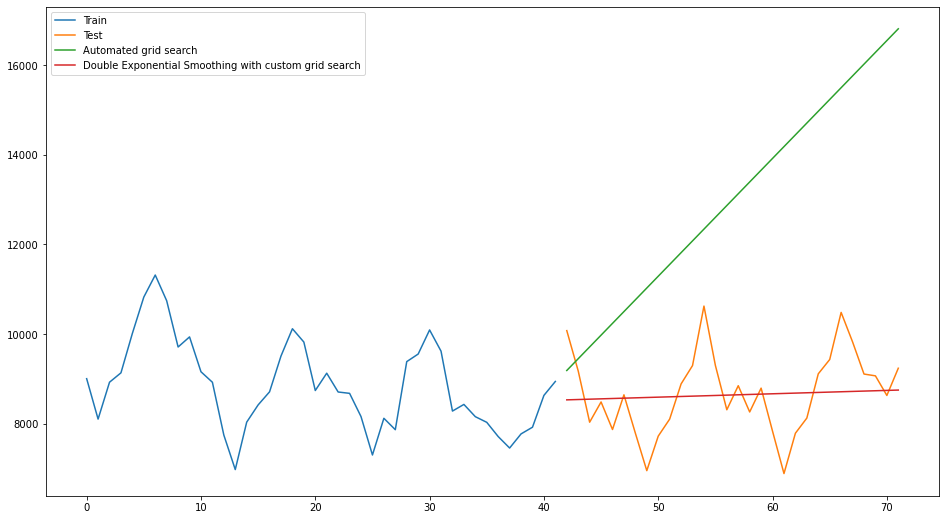

In [32]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(X_train, label='Train')
plt.plot(X_test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()